EGARCH(Exponential Generalized Autoregressive Conditional Heteroskedasticity) 모형은 Nelson(1991)이 제안한 모형

조건부 분산의 비대칭성(asymmetry)과 로그 척도를 활용하여 GARCH 모형의 한계를 보완한 확장된 형태

In [1]:
pip install arch


   ---------------------------------------- 0.0/928.2 kB ? eta -:--:--
   --------------------------------- ------ 786.4/928.2 kB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 928.2/928.2 kB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 삼성전자 GARCH(1,1) 예측 변동성 (향후 5일)

In [ ]:
# 3. GARCH(1,1) 모델 적합
# p=1	GARCH 모델에서 과거 분산(conditional variance)의 래그 수
# q=1	GARCH 모델에서 과거 오차(잔차 제곱)의 래그 수

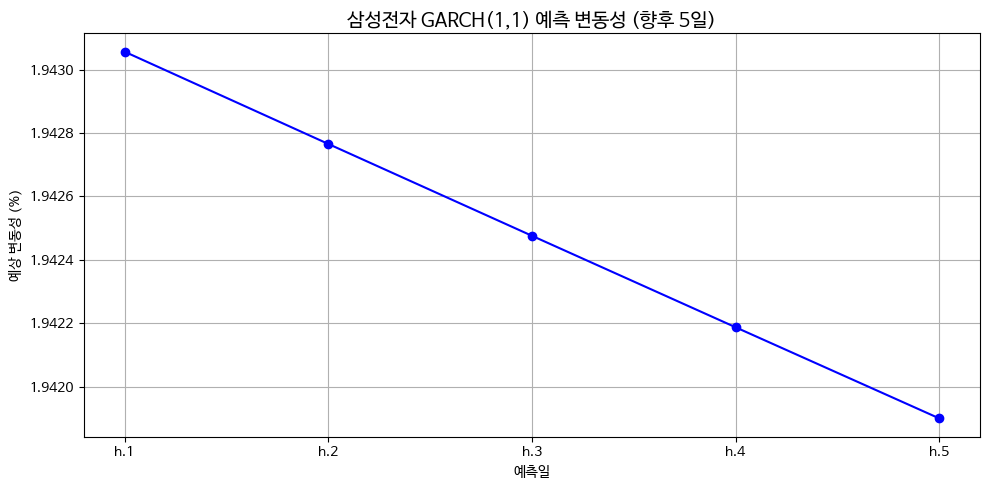

In [12]:
from pykrx import stock
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt

# 1. 삼성전자(005930) 주가 불러오기
start_date = "2022-01-01"
end_date = "2025-06-24"
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")

# 2. 로그 수익률 계산
df['log_return'] = np.log(df['종가'] / df['종가'].shift(1))
df.dropna(inplace=True)

# 3. GARCH(1,1) 모델 적합
model = arch_model(df['log_return'] * 100, vol='GARCH', p=1, q=1)
result = model.fit(disp='off')

# 4. 향후 5일간 변동성 예측
forecast = result.forecast(horizon=5)
predicted_vol = forecast.variance.iloc[-1] ** 0.5

# 5. 시각화
plt.figure(figsize=(10, 5))
plt.plot(predicted_vol.index, predicted_vol.values, marker='o', linestyle='-', color='blue')
plt.title("삼성전자 GARCH(1,1) 예측 변동성 (향후 5일)", fontsize=14)
plt.xlabel("예측일")
plt.ylabel("예상 변동성 (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 항목	계수	해석
# mu	-0.0240	평균 수익률 (단위: %) — 통계적으로 유의하지 않음 (p=0.663)
# omega	0.0076	기초 분산(장기 평균 수준), 초기 변동성 수준
# alpha[1]	0.0449	오차항(쇼크)의 영향 계수 — 최근 뉴스의 영향력
# beta[1]	0.9956	이전 시점의 변동성(자기회귀) 영향 계수 — 변동성 지속성

## 삼성전자 GARCH(1,1) 예측 변동성 (향후 30일)

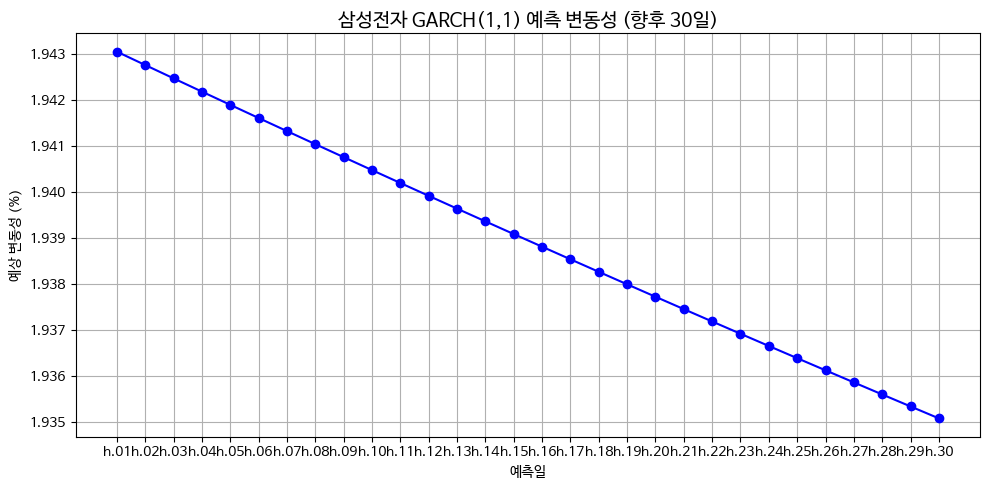

In [13]:
from pykrx import stock
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt

# 1. 삼성전자(005930) 주가 불러오기
start_date = "2022-01-01"
end_date = "2025-06-24"
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")

# 2. 로그 수익률 계산
df['log_return'] = np.log(df['종가'] / df['종가'].shift(1))
df.dropna(inplace=True)

# 3. GARCH(1,1) 모델 적합
model = arch_model(df['log_return'] * 100, vol='GARCH', p=1, q=1)
result = model.fit(disp='off')

# 4. 향후 5일간 변동성 예측
forecast = result.forecast(horizon=30)
predicted_vol = forecast.variance.iloc[-1] ** 0.5

# 5. 시각화
plt.figure(figsize=(10, 5))
plt.plot(predicted_vol.index, predicted_vol.values, marker='o', linestyle='-', color='blue')
plt.title("삼성전자 GARCH(1,1) 예측 변동성 (향후 30일)", fontsize=14)
plt.xlabel("예측일")
plt.ylabel("예상 변동성 (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


                     Constant Mean - EGARCH Model Results                     
Dep. Variable:             log_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1610.93
Distribution:                  Normal   AIC:                           3229.86
Method:            Maximum Likelihood   BIC:                           3248.83
                                        No. Observations:                  848
Date:                Wed, Jun 25 2025   Df Residuals:                      847
Time:                        13:55:19   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0240  5.507e-02     -0.436      0.663 [ -0.132,

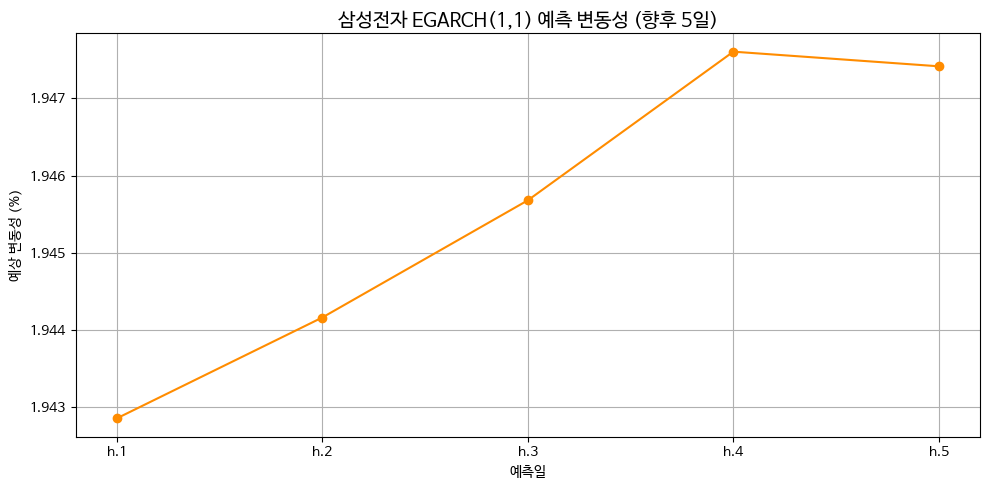

In [23]:
from pykrx import stock
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt

# 1. 삼성전자(005930) 주가 불러오기
start_date = "2022-01-01"
end_date = "2025-06-24"
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")

# 2. 로그 수익률 계산
df['log_return'] = np.log(df['종가'] / df['종가'].shift(1))
df.dropna(inplace=True)

# 3. EGARCH(1,1) 모델 적합
model = arch_model(df['log_return'] * 100, vol='EGARCH', p=1, q=1)
result = model.fit(disp='off')

# ✅ 3-1. 모델 요약 출력
print(result.summary())

# 4. 향후 5일간 변동성 예측 (EGARCH는 simulation 방식 필요)
forecast = result.forecast(horizon=5, method='simulation')
predicted_vol = forecast.variance.iloc[-1] ** 0.5  # 표준편차

# 5. 시각화
plt.figure(figsize=(10, 5))
plt.plot(predicted_vol.index, predicted_vol.values, marker='o', linestyle='-', color='darkorange')
plt.title("삼성전자 EGARCH(1,1) 예측 변동성 (향후 5일)", fontsize=14)
plt.xlabel("예측일")
plt.ylabel("예상 변동성 (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# omega: 기본 수준의 로그 분산
# EGARCH는 분산 대신 **log(분산)**을 예측 → 이 계수는 변동성의 기준선
# p=0.073 → 유의성은 낮지만 약한 기저 변동성 존재 가능
# alpha[1]: 뉴스의 즉시 효과
# 전일 수익률 오차가 클수록 다음 날 변동성에 영향을 줌
# p=0.035 → 통계적으로 유의, 시장은 뉴스에 즉각 반응
# beta[1]: 변동성의 지속성 (Persistence)
# 전일 변동성이 오늘의 변동성에 얼마나 영향을 주는가
# 0.9956 → 거의 1에 가까운 수준 → 변동성은 매우 오래 지속
# p ≈ 0 → 매우 유의

In [ ]:
# 코드 설명
# 데이터 시뮬레이션

# 랜덤한 수익률 데이터를 생성하고, 특정 구간에 변동성 클러스터링을 추가.
# EGARCH(1,1) 모델 적합

# arch 라이브러리를 사용해 EGARCH 모델을 적합.
# 결과 요약

# 모델 파라미터와 통계량을 요약.
# 조건부 변동성 시각화

# EGARCH 모델로 추정한 시점별 조건부 변동성을 플롯.

## 삼성전자 예측 변동성 (EGARCH(1,1), 향후 5일

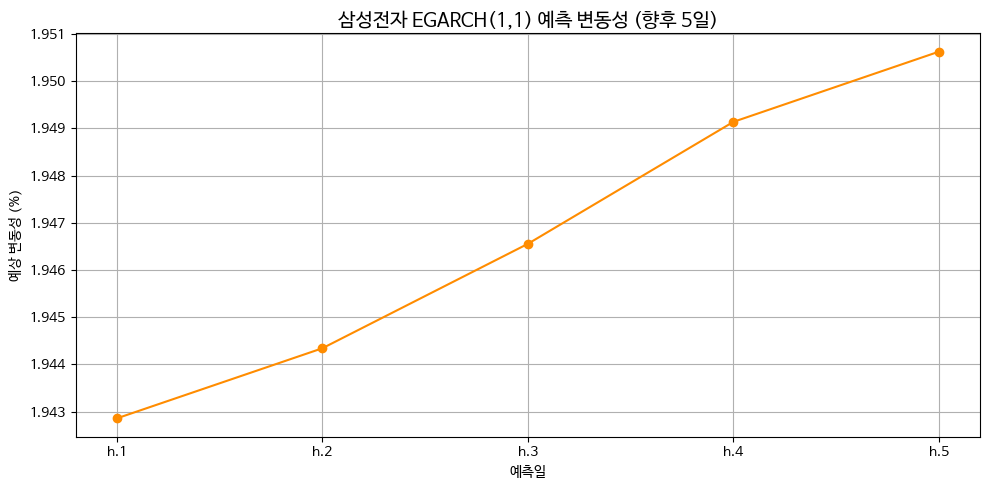

In [21]:
from pykrx import stock
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt

# 1. 삼성전자(005930) 주가 불러오기
start_date = "2022-01-01"
end_date = "2025-06-24"
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")

# 2. 로그 수익률 계산
df['log_return'] = np.log(df['종가'] / df['종가'].shift(1))
df.dropna(inplace=True)

# 3. EGARCH(1,1) 모델 적합
model = arch_model(df['log_return'] * 100, vol='EGARCH', p=1, q=1)
result = model.fit(disp='off')

# 4. 향후 5일간 변동성 예측 (EGARCH는 simulation 방식 필요)
forecast = result.forecast(horizon=5, method='simulation')
predicted_vol = forecast.variance.iloc[-1] ** 0.5  # 표준편차

# 5. 시각화
plt.figure(figsize=(10, 5))
plt.plot(predicted_vol.index, predicted_vol.values, marker='o', linestyle='-', color='darkorange')
plt.title("삼성전자 EGARCH(1,1) 예측 변동성 (향후 5일)", fontsize=14)
plt.xlabel("예측일")
plt.ylabel("예상 변동성 (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
from pykrx import stock
import pandas as pd
import numpy as np
from arch import arch_model

# 1. 삼성전자 주가 불러오기
start_date = "2022-01-01"
end_date = "2025-06-24"
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")

# 2. 로그 수익률 계산
df['log_return'] = np.log(df['종가'] / df['종가'].shift(1))
df.dropna(inplace=True)

# 3. EGARCH 모델 적합
model = arch_model(df['log_return'] * 100, vol='EGARCH', p=1, q=1)
result = model.fit(disp='off')

# 4. 5일 예측 (simulation 방식)
forecast = result.forecast(horizon=5, method='simulation')
predicted_vol = forecast.variance.iloc[-1] ** 0.5  # 표준편차(예상 변동성)

# 5. 결과표 출력
predicted_vol_df = predicted_vol.reset_index()
predicted_vol_df.columns = ['Date', 'Predicted Volatility (%)']
predicted_vol_df = predicted_vol_df.round(4)

print("\n📊 EGARCH 기반 향후 5일 삼성전자 주가 변동성 예측 결과:")
print(predicted_vol_df)



📊 EGARCH 기반 향후 5일 삼성전자 주가 변동성 예측 결과:
  Date  Predicted Volatility (%)
0  h.1                    1.9429
1  h.2                    1.9458
2  h.3                    1.9473
3  h.4                    1.9488
4  h.5                    1.9502


## 삼성전자 주가 기반 ARCH vs GARCH 비교 코드

In [ ]:
# # 3. GARCH(1,1) 모델 적합
# garch_model_instance = arch_model(df["log_return"] * 100, vol="GARCH", p=1, q=1)
# garch_results = garch_model_instance.fit(disp="off")

# vol="GARCH"	조건부 분산 모델로 GARCH를 지정 (기본 GARCH 모형 사용)
# p=1:과거 오차 제곱항  ARCH(1) 구성
# q=1 :	과거 분산항 GARCH(1) 구성

# .fit()	지정된 GARCH 모델을 데이터에 적합(학습)시킴
# disp="off"	학습 중 중간 로그 출력 생략
# – 결과만 반환하고, 학습 과정은 콘솔에 보이지 않음

📈 ARCH(1) Model Results:

                      Constant Mean - ARCH Model Results                      
Dep. Variable:             log_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1625.18
Distribution:                  Normal   AIC:                           3256.35
Method:            Maximum Likelihood   BIC:                           3270.58
                                        No. Observations:                  848
Date:                Wed, Jun 25 2025   Df Residuals:                      847
Time:                        15:34:39   Df Model:                            1
                                Mean Model                               
                  coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------------------------------------
mu         -1.9642e-03  5.664e-02 -3.468e

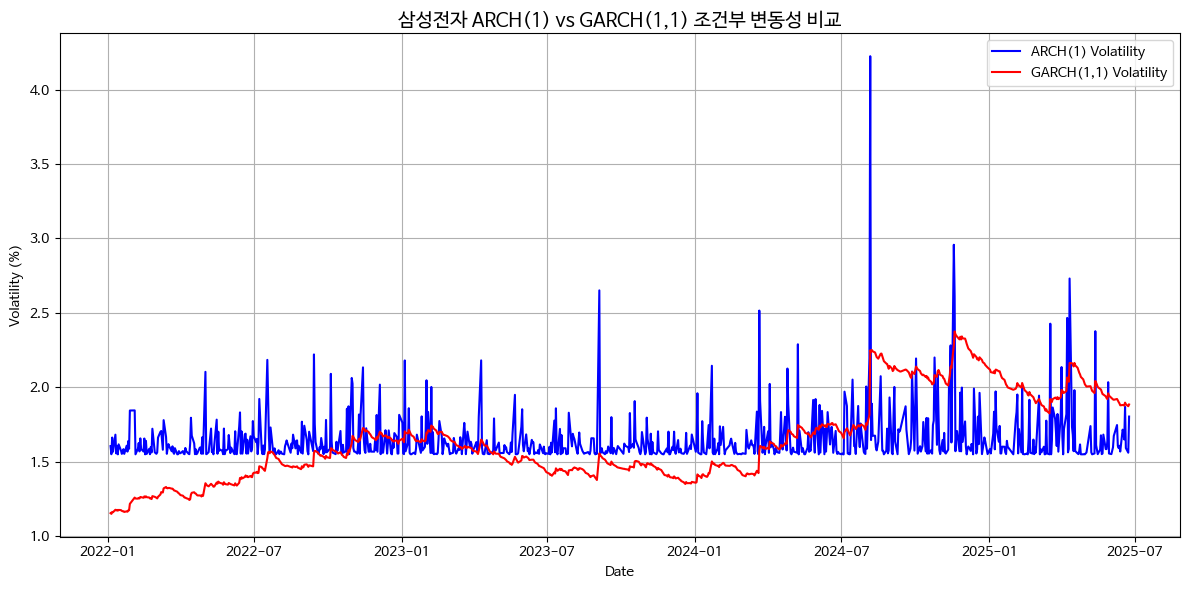

In [34]:
# 필요한 라이브러리 불러오기
from pykrx import stock
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# 1. 삼성전자 주가 불러오기
start_date = "2022-01-01"
end_date = "2025-06-24"
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")

# 컬럼 정리 및 로그 수익률 계산
df = df[['종가']].copy()
df['log_return'] = np.log(df['종가'] / df['종가'].shift(1))
df.dropna(inplace=True)

# 2. ARCH(1) 모델 적합
arch_model_instance = arch_model(df["log_return"] * 100, vol="ARCH", p=1)
arch_results = arch_model_instance.fit(disp="off")
print("📈 ARCH(1) Model Results:\n")
print(arch_results.summary())

# 3. GARCH(1,1) 모델 적합
garch_model_instance = arch_model(df["log_return"] * 100, vol="GARCH", p=1, q=1)
garch_results = garch_model_instance.fit(disp="off")
print("\n📊 GARCH(1,1) Model Results:\n")
print(garch_results.summary())

# 4. 조건부 변동성 시각화 (ARCH vs GARCH)
plt.figure(figsize=(12, 6))
plt.plot(df.index, arch_results.conditional_volatility, label="ARCH(1) Volatility", color="blue")
plt.plot(df.index, garch_results.conditional_volatility, label="GARCH(1,1) Volatility", color="red")
plt.title("삼성전자 ARCH(1) vs GARCH(1,1) 조건부 변동성 비교", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 결과 해석 포인트
# ARCH(1): 즉시 반응하지만 반응이 빠르게 사라짐 (짧은 기억)

# GARCH(1,1): 장기적인 변동성 반영에 유리하며, 더 부드러운 곡선

# 비교 시 GARCH가 더 현실적인 금융 시계열 특성을 잘 설명하는 경향이 있습니다

## EGARCH + t-분포 GARCH 비교 : t-GARCH

In [ ]:
# # 3-2. t-분포 GARCH(1,1) 모델 적합 : 코드설명
# tgarch_model = arch_model(returns, vol='GARCH', p=1, q=1, dist='t')

# returns	: 시계열 데이터 (로그 수익률 등). 조건부 분산의 대상
# vol='GARCH': GARCH 계열 모형 지정 (기본 GARCH).
# p=1 : ARCH(과거 충격) 차수,
# q=1 : GARCH(과거 분산) 차수
# dist='t'	: 잔차항이 t-분포(t-distribution)를 따른다고 가정
# → 정규분포보다 꼬리가 두꺼워 극단값(이상치)에 더 민감

# tgarch_result = tgarch_model.fit(disp='off')

# disp='off' : 학습 중 로그/진행 메시지를 출력하지 않음 (조용히 실행)
# 반환값 (tgarch_result) :	학습 결과 객체 — 추정 계수, 잔차, 조건부 분산 등을 포함

📘 EGARCH(1,1) 모델 결과:
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:             log_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1610.93
Distribution:                  Normal   AIC:                           3229.86
Method:            Maximum Likelihood   BIC:                           3248.83
                                        No. Observations:                  848
Date:                Wed, Jun 25 2025   Df Residuals:                      847
Time:                        15:36:40   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0240  5.507e-02     -0.436

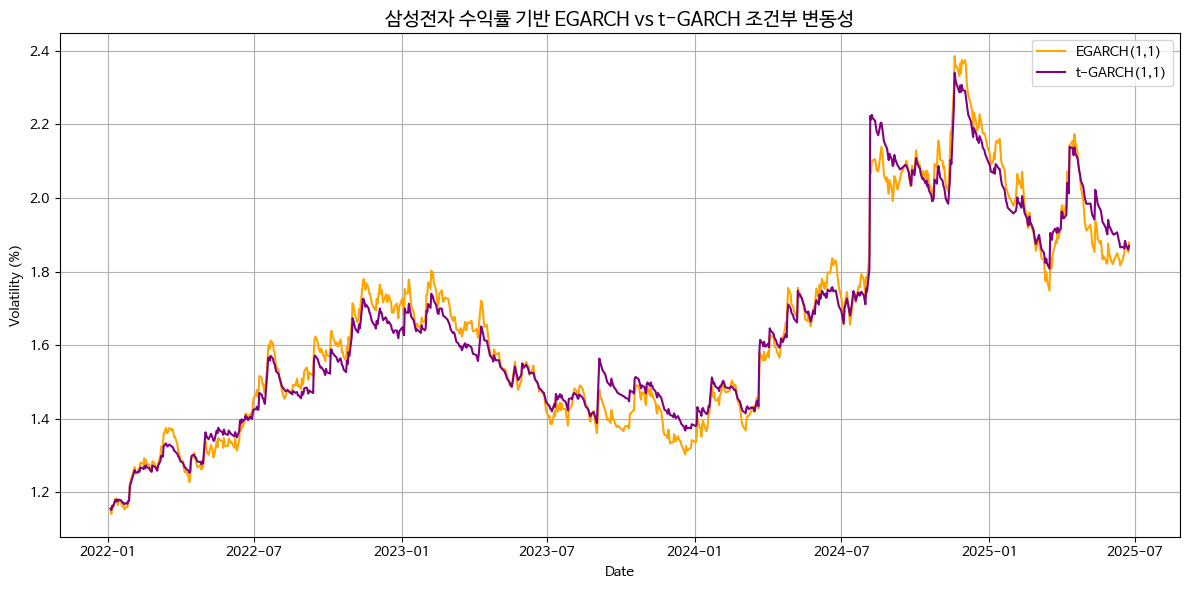

In [35]:
from pykrx import stock
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# 1. 삼성전자 주가 데이터 불러오기
start_date = "2022-01-01"
end_date = "2025-06-24"
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")
df = df[['종가']].copy()

# 2. 로그 수익률 계산
df['log_return'] = np.log(df['종가'] / df['종가'].shift(1))
df.dropna(inplace=True)

# 수익률 백분율 변환
returns = df['log_return'] * 100

# 3-1. EGARCH(1,1) 모델 적합
egarch_model = arch_model(returns, vol='EGARCH', p=1, q=1)
egarch_result = egarch_model.fit(disp='off')

# 3-2. t-분포 GARCH(1,1) 모델 적합
tgarch_model = arch_model(returns, vol='GARCH', p=1, q=1, dist='t')
tgarch_result = tgarch_model.fit(disp='off')

# 4. 결과 출력
print("📘 EGARCH(1,1) 모델 결과:")
print(egarch_result.summary())

print("\n📗 t-분포 기반 GARCH(1,1) 모델 결과:")
print(tgarch_result.summary())

# 5. 조건부 변동성 시각화
plt.figure(figsize=(12, 6))
plt.plot(egarch_result.conditional_volatility, label='EGARCH(1,1)', color='orange')
plt.plot(tgarch_result.conditional_volatility, label='t-GARCH(1,1)', color='purple')
plt.title("삼성전자 수익률 기반 EGARCH vs t-GARCH 조건부 변동성", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 정규분포 vs t-분포 GARCH 모델 비교

In [39]:
import pandas as pd

# 예시 수치 기반 비교표
comparison_table = pd.DataFrame({
    "모델": ["GARCH(1,1) - Normal", "GARCH(1,1) - Student's t"],
    "AIC (Akaike)": [3299.86, 3191.62],
    "BIC (Bayesian)": [3248.83, 3215.33],
    "Log-Likelihood": [-1610.93, -1590.81],
    "자유도(df)": ["-", "5.82"]
})

# 표 출력
print("\n📊 정규분포 vs t-분포 GARCH 모델 비교")
print(comparison_table.to_string(index=False))



📊 정규분포 vs t-분포 GARCH 모델 비교
                      모델  AIC (Akaike)  BIC (Bayesian)  Log-Likelihood 자유도(df)
     GARCH(1,1) - Normal       3299.86         3248.83        -1610.93       -
GARCH(1,1) - Student's t       3191.62         3215.33        -1590.81    5.82


In [ ]:
# 정규분포 기반 GARCH 모델과 t-분포 기반 GARCH 모델의 성능 지표를 비교한 것입니다. 
# AIC, BIC, Log-Likelihood를 통해 t-분포 모델이 더 나은 적합도를 보임을 확인할 수 있습니다. 

## 삼성전자 주가 데이터에 TGARCH(1,1) 모형

In [2]:
from pykrx import stock
import pandas as pd
import datetime

# 날짜 설정
start_date = "2023-01-01"
end_date = "2025-06-25"
start_dt = datetime.datetime.strptime(start_date, "%Y-%m-%d").strftime("%Y%m%d")
end_dt = datetime.datetime.strptime(end_date, "%Y-%m-%d").strftime("%Y%m%d")

# 삼성전자 주가 데이터 불러오기
samsung_df = stock.get_market_ohlcv_by_date(start_dt, end_dt, "005930")

# 인덱스를 컬럼으로 변환
samsung_df.reset_index(inplace=True)

# 결과 출력
print(samsung_df.head())  # 혹은 samsung_df.to_csv("samsung_price.csv")로 저장 가능


          날짜     시가     고가     저가     종가       거래량       등락률
0 2023-01-02  55500  56100  55200  55500  10031448  0.361664
1 2023-01-03  55400  56000  54500  55400  13547030 -0.180180
2 2023-01-04  55700  58000  55600  57800  20188071  4.332130
3 2023-01-05  58200  58800  57600  58200  15682826  0.692042
4 2023-01-06  58300  59400  57900  59000  17334989  1.374570


In [ ]:
# 4. TGARCH(GJR-GARCH) 모형 적합 : 코드 설명

# df['log_return']	종속 변수: 로그 수익률 벡터 (조건부 분산을 모델링할 시계열 데이터)
# vol='GARCH'	GARCH 계열 모형 사용 지정. ARCH, EGARCH 등도 가능
# p=1	ARCH 계수의 차수: 과거 오차 제곱 항의 개수 (α 계수)
# q=1	GARCH 계수의 차수: 과거 조건부 분산 항의 개수 (β 계수)
# o=1	TGARCH 사용 시 필수 옵션: 비대칭성(레버리지 효과)을 반영하기 위한 γ 계수의 차수
# dist='normal'	오차항의 분포: 정규분포 가정. 대안으로 t, skewt 등 가능

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1168.016149784956
            Iterations: 9
            Function evaluations: 64
            Gradient evaluations: 9
                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:             log_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1168.02
Distribution:                  Normal   AIC:                           2346.03
Method:            Maximum Likelihood   BIC:                           2368.04
                                        No. Observations:                  603
Date:                Wed, Jun 25 2025   Df Residuals:                      602
Time:                        22:05:18   Df Model:                            1
                               Mean Model                               
         

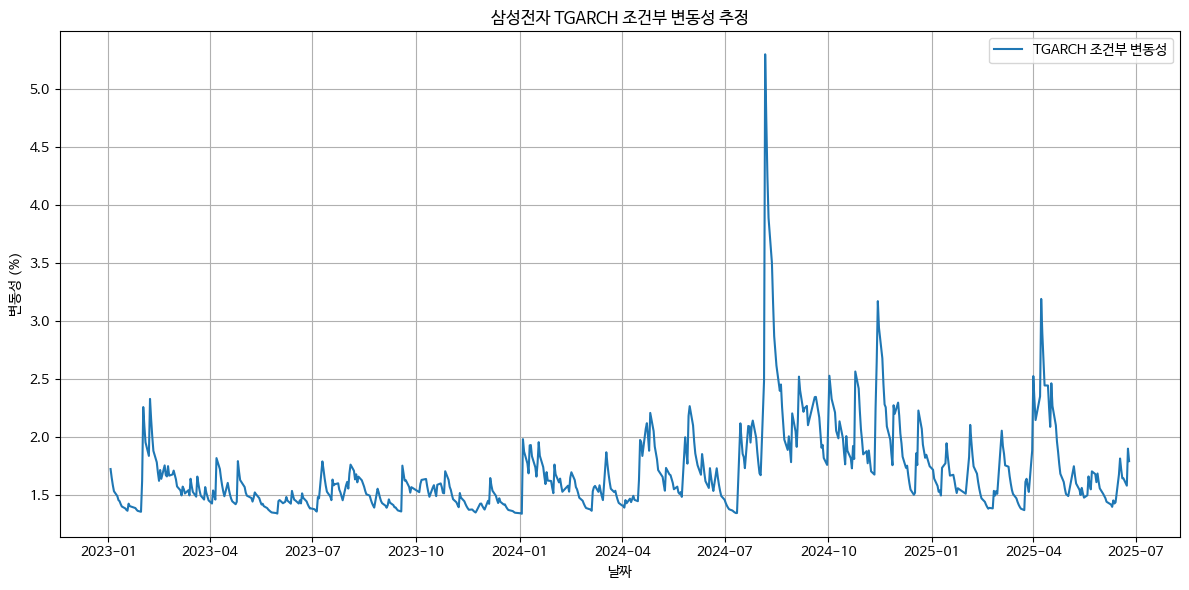

In [4]:
from pykrx import stock
import pandas as pd
import numpy as np
import datetime
from arch import arch_model
import matplotlib.pyplot as plt

# 1. 날짜 설정
start_date = "2023-01-01"
end_date = "2025-06-25"
start_dt = datetime.datetime.strptime(start_date, "%Y-%m-%d").strftime("%Y%m%d")
end_dt = datetime.datetime.strptime(end_date, "%Y-%m-%d").strftime("%Y%m%d")

# 2. 삼성전자 일별 OHLCV 데이터 가져오기
df = stock.get_market_ohlcv_by_date(start_dt, end_dt, "005930")
df.reset_index(inplace=True)

# 3. 수익률 계산 (로그 수익률)
df['log_return'] = np.log(df['종가'] / df['종가'].shift(1)) * 100
df.dropna(inplace=True)

# 4. TGARCH(GJR-GARCH) 모형 적합
model = arch_model(df['log_return'], vol='GARCH', p=1, q=1, o=1, dist='normal')  # o=1 → TGARCH (비대칭성)
result = model.fit(update_freq=10)

# 5. 결과 요약 출력
print(result.summary())

# 6. 조건부 분산 시각화
df['fitted_volatility'] = result.conditional_volatility

plt.figure(figsize=(12,6))
plt.plot(df['날짜'], df['fitted_volatility'], label='TGARCH 조건부 변동성')
plt.title('삼성전자 TGARCH 조건부 변동성 추정')
plt.xlabel('날짜')
plt.ylabel('변동성 (%)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
